Accuracy: 1.00


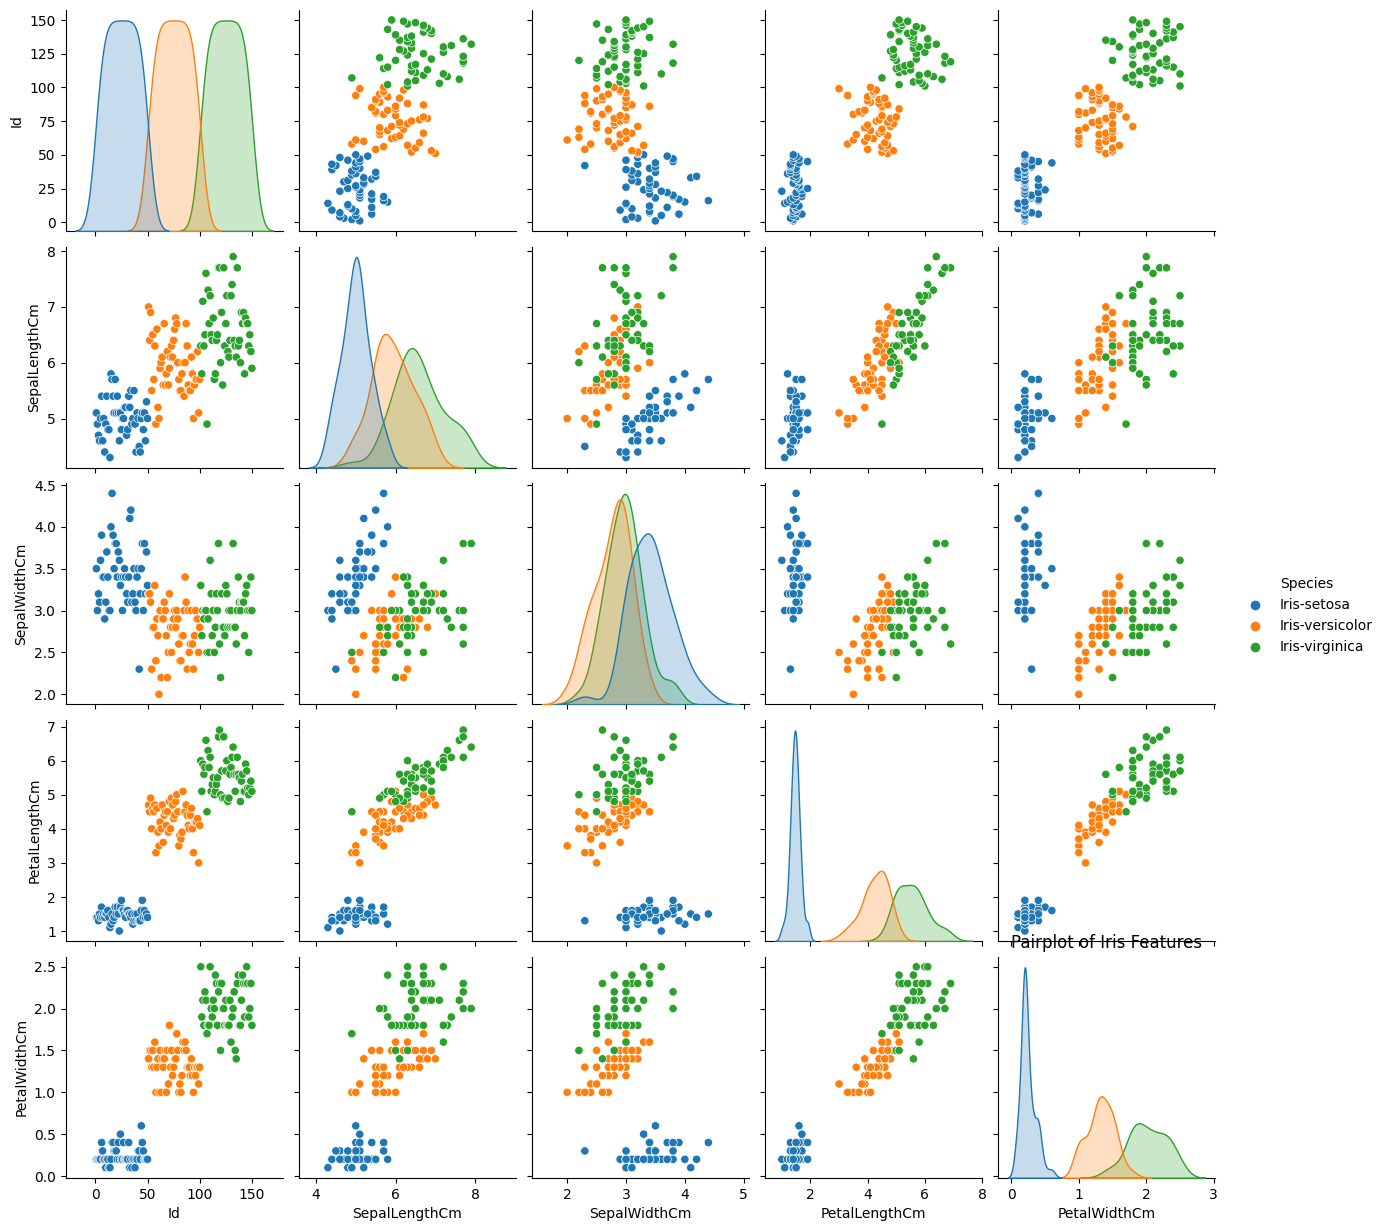

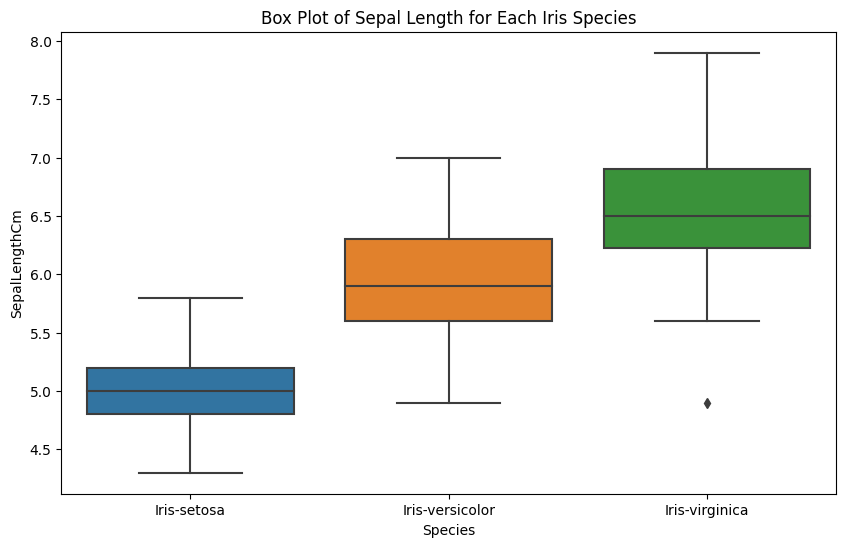

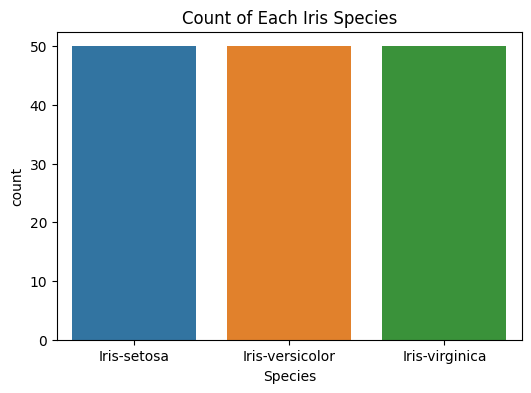


Sample of predicted and actual labels for the test data:
           Predicted           Actual
73   Iris-versicolor  Iris-versicolor
18       Iris-setosa      Iris-setosa
118   Iris-virginica   Iris-virginica
78   Iris-versicolor  Iris-versicolor
76   Iris-versicolor  Iris-versicolor


In [5]:
import pandas as pd
import zipfile
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the ZIP file
zip_file_path = 'C:/Users/Home/OneDrive/Documents/6th sem/IRIS.zip'

# Unzip the ZIP file to a temporary folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Assuming the CSV file is named 'iris.csv' inside the ZIP
    csv_filename = 'Iris.csv'
    zip_ref.extract(csv_filename, './')

# Load the data from the CSV file
data = pd.read_csv(csv_filename)

# Step 2: Preprocess the data (if needed)
# No specific preprocessing needed for the Iris dataset

# Step 3: Split the data into features and target variable
X = data.drop('Species', axis=1)  # Features (measurements)
y = data['Species']  # Target (labels)

# Step 4: Create the SVM classifier
svm_model = SVC(kernel='linear')

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model on the training data
svm_model.fit(X_train, y_train)

# Step 7: Evaluate the model on the testing data
accuracy = svm_model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Visualization 1: Pairplot to visualize relationships between features
sns.pairplot(data, hue='Species')
plt.title("Pairplot of Iris Features")
plt.show()

# Visualization 2: Box plot to compare feature distributions for each species
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=data)
plt.title("Box Plot of Sepal Length for Each Iris Species")
plt.show()

# Visualization 3: Count plot to visualize the distribution of species
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=data)
plt.title("Count of Each Iris Species")
plt.show()

# Optional: Print a sample of the predicted and actual labels for the test data
predictions = svm_model.predict(X_test)
df_results = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
print("\nSample of predicted and actual labels for the test data:")
print(df_results.head())
